In [51]:
# importing pandas
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
import mplcursors



In [9]:
# Read in the CSV file as a Pandas DataFrame
film_titles_df = pd.read_csv(
    Path("Data/filmtitles2.csv")
)
film_titles_df

,id,title,type,description,release_year,age_certification,runtime,production_countries,imdb_id,imdb_score,...,history,horror,music,reality,romance,scifi,sport,thriller,war,western
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,US,tt0075314,8.2,...,0,0,0,0,0,0,0,0,0,0
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,US,tt0068473,7.7,...,0,0,0,0,0,0,0,1,0,0
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,GB,tt0071853,8.2,...,0,0,0,0,0,0,0,0,0,0
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"GB,US",tt0061578,7.7,...,0,0,0,0,0,0,0,0,1,0
4,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,GB,tt0079470,8.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424,tm1066324,Super Monsters: Once Upon a Rhyme,MOVIE,The Super Monsters rethink exemplary fantasies...,2021,NaN,25,NaN,tt14586752,5.6,...,0,0,0,0,0,0,0,0,0,0
3425,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,NaN,93,EG,tt14216488,5.0,...,0,0,0,0,1,0,0,0,0,0
3426,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,NG,tt13857480,6.8,...,0,0,0,0,1,0,0,0,0,0
3427,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,NaN,tt11803618,7.7,...,0,0,0,0,0,0,0,0,0,0


In [10]:
film_titles_df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'production_countries', 'imdb_id',
       'imdb_score', 'imdb_votes', 'action', 'animation', 'comedy', 'crime',
       'documentation', 'drama', 'european', 'family', 'fantasy', 'history',
       'horror', 'music', 'reality', 'romance', 'scifi', 'sport', 'thriller',
       'war', 'western'],
      dtype='object')

In [5]:
# Drop extra columns not needed for the plots
imdb_score_df = film_titles_df.drop(columns=["id","title","type","description","release_year","age_certification","runtime","production_countries","imdb_id","imdb_votes"])
imdb_score_df


In [31]:
# Create an empty list to store genre statistics
genre_stats = []

# Iterate over each column in the DataFrame
for column in imdb_score_df.columns[1:]:
    # Filter the DataFrame to include rows where the genre is present (i.e., value is 1)
    genre_movies = imdb_score_df[imdb_score_df[column] == 1]
    
    # Calculate count, max, and min IMDb scores for the current genre
    count = len(genre_movies)
    max_score = genre_movies['imdb_score'].max()
    min_score = genre_movies['imdb_score'].min()
    
    # Append the genre statistics to the list
    genre_stats.append({'genre': column, 'max_imdb_score': max_score, 'min_imdb_score': min_score, 'cnt_of_scores': count})

# Create DataFrame from the list of genre statistics
genre_df = pd.DataFrame(genre_stats)

# sort the genres by cnt_of_scores
genre_df = genre_df.sort_values(by='cnt_of_scores', ascending=False)

# Display the DataFrame
print(genre_df)

            genre  max_imdb_score  min_imdb_score  cnt_of_scores
5           drama             9.1             1.5           1805
2          comedy             8.7             1.6           1493
16       thriller             8.8             1.5            792
0          action             9.1             1.7            688
13        romance             8.8             2.1            683
4   documentation             8.9             2.3            539
3           crime             8.7             2.0            533
6        european             8.5             1.6            329
7          family             8.6             1.6            328
8         fantasy             8.7             2.8            304
10         horror             8.2             2.6            249
1       animation             9.1             2.3            229
14          scifi             8.8             1.5            200
11          music             8.8             2.3            173
9         history        

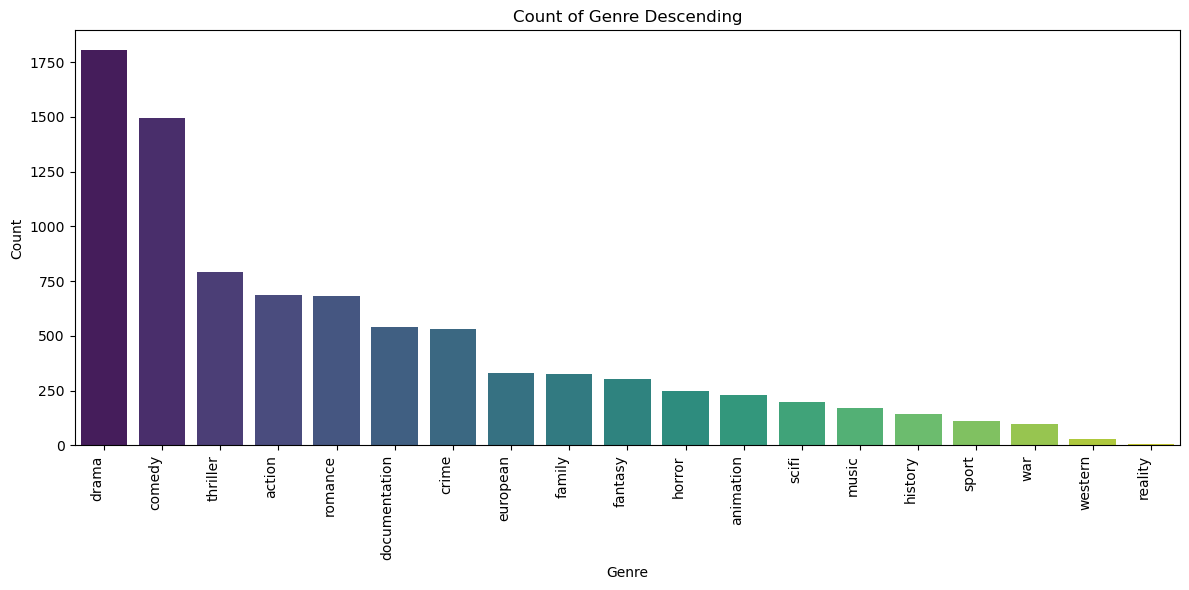

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x="genre",y="cnt_of_scores", data=genre_df, palette='viridis')

plt.title('Count of Genre Descending')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

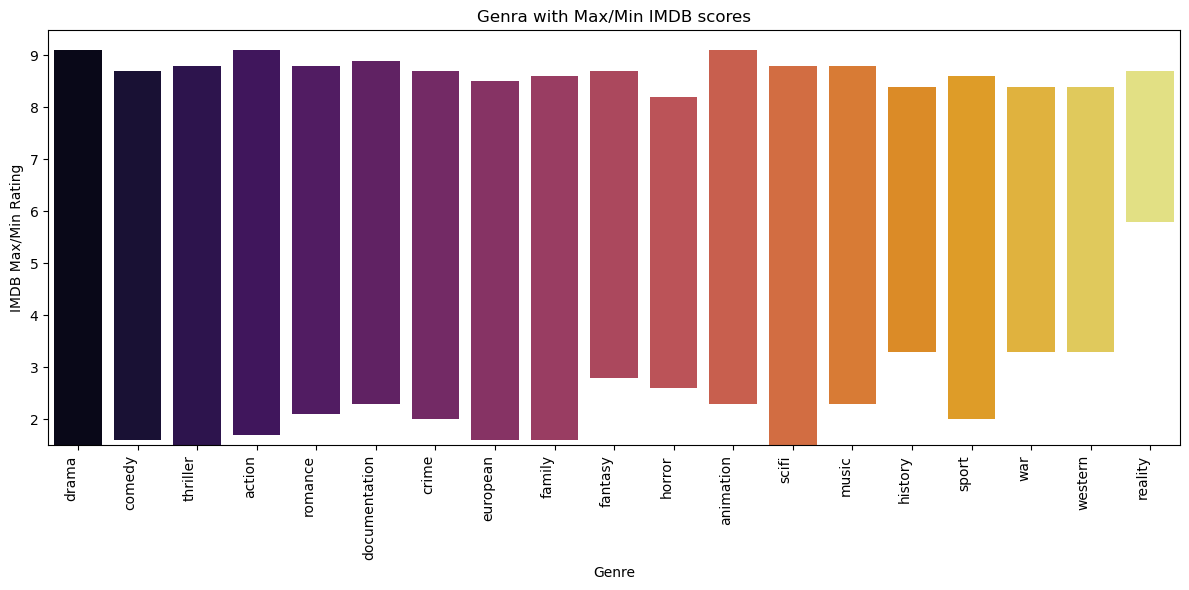

In [62]:
# Bar plot of max and min IMDB scores

plt.figure(figsize=(12, 6))

# sns.barplot(ymin='min_imdb_score', ymax='max_imdb_score', x='genre', data=genre_df, palette='viridis' )
# Use sns.barplot to create the bar plot
sns.barplot(x='genre', y=genre_df['max_imdb_score'] - genre_df['min_imdb_score'], 
            bottom=genre_df['min_imdb_score'], data=genre_df, palette='inferno')


plt.title('Genra with Max/Min IMDB scores')
plt.xlabel('Genre')
plt.ylabel('IMDB Max/Min Rating')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

plt.show